In [1]:
using LinearAlgebra, Random, ToeplitzMatrices, PyPlot

In [2]:
eye(T::Type, n) = Diagonal{T}(I, n)
eye(n) = eye(Float64, n)
vec(X) = vcat(X...)

vec (generic function with 1 method)

In [3]:
# Equality Constrained Quadratic Programming
function solveEqualityConstrainedQuadProg(P, q, A, b)
    """
    minimize   : 1/2 * x'*P*x + q'*x
    subject to : A*x = b
    """
    K = [P A'; A zeros(size(A)[1], size(A)[1])] # KKT matrix
    sol = K \ [-q; b]
    return sol[1:size(A)[2]]
end

solveEqualityConstrainedQuadProg (generic function with 1 method)

In [4]:
t1 = 224*1e-3 # time const of eye dynamics (s)
t2 = 13*1e-3  # another time const of eye dynamics (s)
tm = 10*1e-3
dt = 1e-3     # simulation time step (s)
tf = 50*1e-3  # movement duration (s)
tp = 30*1e-3  # post-movement duration (s)
ntf = round(Int, tf/dt)
ntp = round(Int, tp/dt)
nt = ntf + ntp # total time steps
trange = (1:nt) * dt * 1e3 # ms

x0 = zeros(3)       # initial state (pos=0, vel=0, acc=0)
xf = [10; zeros(2)] # final state (pos=10, vel=0, acc=0)
α1 = -1/(t1*t2*tm)
α2 = -1/(t1*t2)-1/(t1*tm)-1/(t2*tm)
α3 = -1/t1-1/t2-1/tm
Ac = [0 1 0; 0 0 1; α1 α2 α3];
Bc = [zeros(2); 1]
A = exp(Ac*dt);
B = Ac^-1 * (A - eye(3)) *Bc; # Bを適切な実装に変更する．

In [5]:
u = 2.5*10^4 * ((trange .< 40) - (trange .> 40) + (trange .> 50)); 

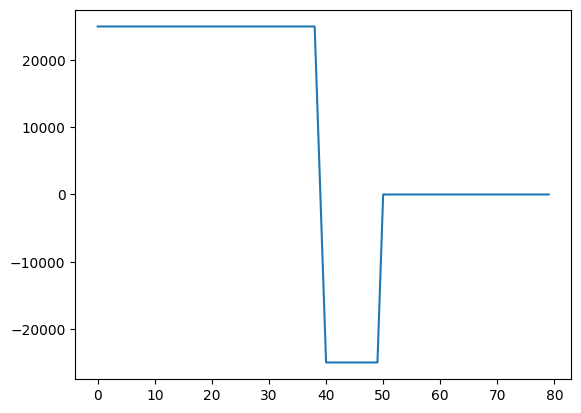

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006D6327F0>

In [6]:
plot(u)

In [7]:
# forward solution
x = zeros(3, nt);
x[:,1] = x0;
for k=1:nt-1
    x[:,k+1] = A*x[:, k] + B*u[k]
end

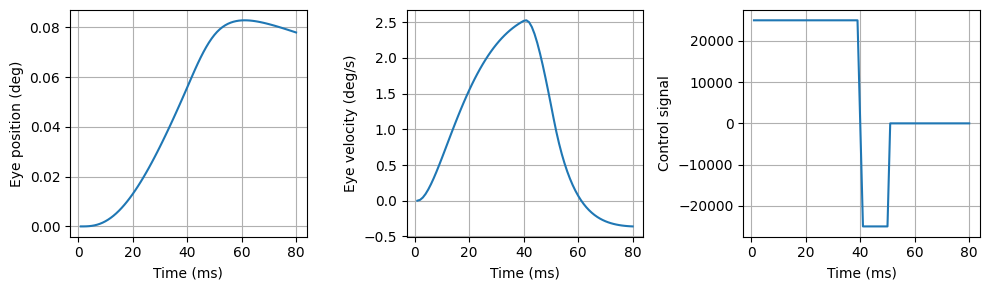

In [8]:
figure(figsize=(10, 3))
subplot(1,3,1)
plot(trange, x[1, :])
ylabel("Eye position (deg)"); xlabel("Time (ms)"); grid()
subplot(1,3,2)
plot(trange, x[2, :])
ylabel("Eye velocity (deg/s)"); xlabel("Time (ms)"); grid()
subplot(1,3,3)
plot(trange, u)
ylabel("Control signal"); xlabel("Time (ms)"); grid()
tight_layout()